# Optimization: SciPy provides functions for finding minimum or maximum values of functions, dealing with linear programming problems, and more.

a) Curve Fitting

Fitted parameters: [1. 1.]


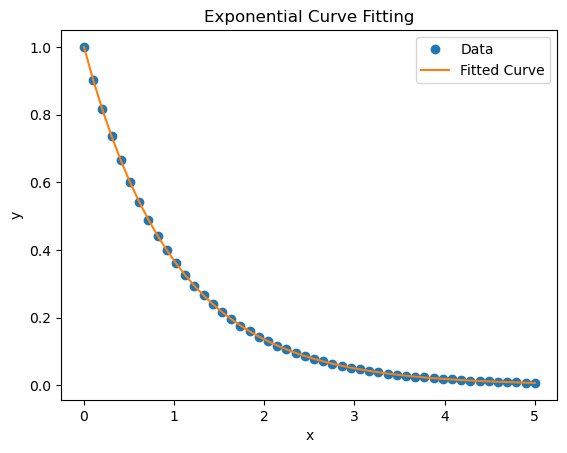

In [1]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
from scipy.optimize import curve_fit  # SciPy for curve fitting
import matplotlib.pyplot as plt  # Matplotlib for plotting

# Sample data (x, y) following an exponential curve
x = np.linspace(0, 5, 50)  # Generate 50 x-values from 0 to 5
y = np.exp(-x)  # Compute corresponding y-values following an exponential curve

# Define the exponential function to fit
def expo(x, a, b):
    """Exponential function to fit"""
    return a * np.exp(-b * x)

# Fit the curve to the data
popt, pcov = curve_fit(expo, x, y)
# curve_fit returns two values:
# popt: an array of optimized parameters (in this case, 'a' and 'b')
# pcov: the estimated covariance of popt

# Print fitted parameters
print("Fitted parameters:", popt)

# Generate data using fitted parameters
fitted_curve = expo(x, *popt)  # Unpack popt tuple and compute fitted curve

# Plot original data and fitted curve
plt.plot(x, y, 'o', label='Data')  # Plot original data points
plt.plot(x, fitted_curve, label='Fitted Curve')  # Plot fitted curve
plt.legend()  # Show legend
plt.xlabel('x')  # Label x-axis
plt.ylabel('y')  # Label y-axis
plt.title('Exponential Curve Fitting')  # Add title
plt.show()  # Show plot

b) Minimization problems:

In [3]:
from scipy.optimize import minimize  # Import minimize function from SciPy

# Define the function to minimize (Rosenbrock function)
def rosenbrock(x):
    """Rosenbrock function"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Initial guess
x0 = np.array([0.5, 1.2])  # Initial guess for the minimum location

# Minimize the function using the Nelder-Mead method
res = minimize(rosenbrock, x0, method='Nelder-Mead')

# Print the minimum value and location
print("Minimum value:", res.fun)  # The value of the function at the minimum
print("Minimum location:", res.x)  # The location (x, y) of the minimum

     

Minimum value: 4.122159305286892e-10
Minimum location: [0.99998963 0.99998101]


In [5]:
import numpy as np  # Import NumPy for numerical operations
from scipy.optimize import minimize  # Import minimize function from SciPy

# Define the objective function to minimize (example: a quadratic function)
def objective_function(x):
    """Quadratic objective function"""
    return x**2 + 2*x + 3

# Initial guess for the optimization process
x0 = np.array([1.0])  # Initial guess for the minimum location

# Perform the optimization using the BFGS method
result = minimize(objective_function, x0, method='BFGS')

# Print the optimized value
print("Optimized value:", result.x)  # The location of the minimum

     

Optimized value: [-0.99999999]


# Integration: It offers tools for numerically calculating integrals, which are helpful for finding areas, volumes, and other quantities.

Total solar energy captured: 17.400000000000002 units (kWh or MJ)


/var/folders/tx/59sw9vk54rldvvh19ht1hf780000gn/T/ipykernel_52135/2355651384.py:11: DeprecationWarning: Bitwise inversion '~' on bool is deprecated. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  sunset_to_night = ~(sunrise_to_morning | midday | afternoon)  # Logical NOT and OR


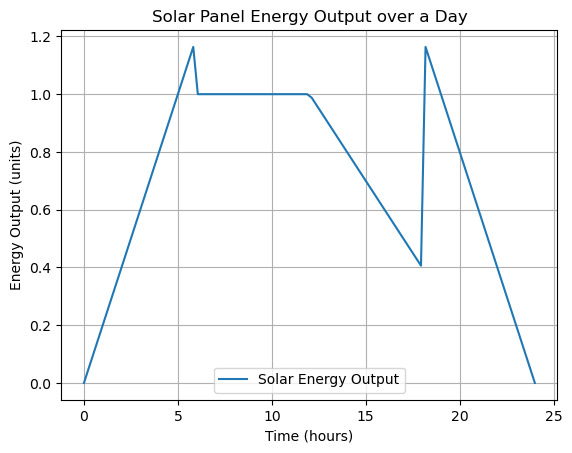

In [7]:
import numpy as np  # Import NumPy for numerical operations
from scipy.integrate import quad  # Import quad function from SciPy for numerical integration
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Function representing solar energy output (piecewise linear)
def solar_energy(time):
    # Define conditions for different times of the day
    sunrise_to_morning = (0 <= time) & (time <= 6)
    midday = (6 < time) & (time <= 12)
    afternoon = (12 < time) & (time <= 18)
    sunset_to_night = ~(sunrise_to_morning | midday | afternoon)  # Logical NOT and OR

    # Calculate energy output based on time of the day
    return np.where(sunrise_to_morning, 0.2 * time,
                   np.where(midday, 1.0,
                            np.where(afternoon, 1.0 - 0.1 * (time - 12),
                                     0.2 * (24 - time))))

# Integration bounds (24-hour day)
a = 0  # Sunrise
b = 24  # Sunset

# Perform numerical integration to calculate total solar energy captured
total_energy, error = quad(solar_energy, a, b)

# Print the total solar energy captured
print("Total solar energy captured:", total_energy, "units (kWh or MJ)")  # Adjust units as needed

# Optional: Plot the solar energy output function
x = np.linspace(a, b, 100)  # Sample points for visualization
y = solar_energy(x)

plt.plot(x, y, label='Solar Energy Output')
plt.xlabel('Time (hours)')
plt.ylabel('Energy Output (units)')
plt.title('Solar Panel Energy Output over a Day')
plt.legend()
plt.grid(True)
plt.show()


# Interpolation: You can use SciPy to estimate values between known data points using various interpolation techniques.


Estimated temperature at 7:30: 12.5 degrees Celsius
Estimated temperature at 13:45: 18.833333333333332 degrees Celsius


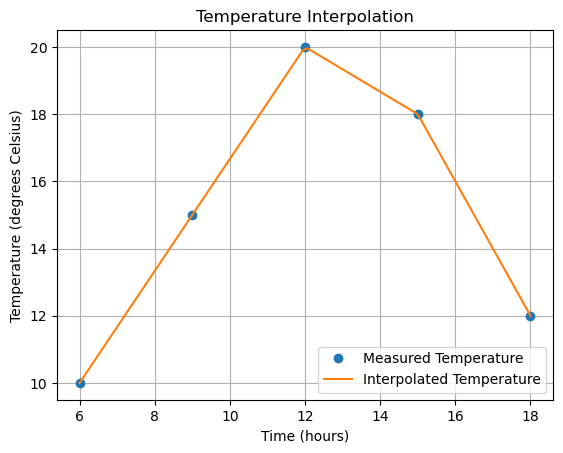

In [9]:
import numpy as np  # Import NumPy for numerical operations
from scipy.interpolate import interp1d  # Import interp1d function for interpolation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Sample temperature data (time in hours, temperature in degrees Celsius)
time = np.array([6, 9, 12, 15, 18])  # Time points
temperature = np.array([10, 15, 20, 18, 12])  # Corresponding temperature values

# Create an interpolation function using linear interpolation
interp_func = interp1d(time, temperature, kind='linear')

# Estimate temperature at specific times (e.g., 7:30, 13:45)
estimated_temp_1 = interp_func(7.5)  # Temperature at 7:30
estimated_temp_2 = interp_func(13.75)  # Temperature at 13:45

print("Estimated temperature at 7:30:", estimated_temp_1, "degrees Celsius")
print("Estimated temperature at 13:45:", estimated_temp_2, "degrees Celsius")

# Optional: Plot the data and interpolation
plt.plot(time, temperature, 'o', label='Measured Temperature')  # Plot measured temperature data points
plt.plot(np.linspace(time.min(), time.max(), 100), interp_func(np.linspace(time.min(), time.max(), 100)), '-', label='Interpolated Temperature')  # Plot interpolated temperature
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (degrees Celsius)')
plt.title('Temperature Interpolation')
plt.legend()
plt.grid(True)
plt.show()

# Linear Algebra: SciPy builds on NumPy and offers advanced functionalities for solving linear systems, finding eigenvalues and eigenvectors, and performing matrix decompositions.


In [11]:
import numpy as np  # Import NumPy for numerical operations
from scipy import linalg  # Import linalg module from SciPy for linear algebra operations

# Create a random square matrix
A = np.random.rand(3, 3)

# Solve a linear system: Ax = b
b = np.random.rand(3)
x = linalg.solve(A, b)  # Solve Ax = b for x
print("Solution to Ax = b:")
print(x)

# Find eigenvalues and eigenvectors of a matrix
eigenvalues, eigenvectors = linalg.eig(A)  # Compute eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Perform Singular Value Decomposition (SVD)
U, S, V = linalg.svd(A)  # Compute SVD
print("\nSingular values:")
print(S)
print("\nLeft singular vectors:")
print(U)
print("\nRight singular vectors (transposed):")
print(V)

# Perform LU decomposition
P, L, U = linalg.lu(A)  # Compute LU decomposition
print("\nLU Decomposition:")
print("Permutation matrix (P):")
print(P)
print("Lower triangular matrix (L):")
print(L)
print("Upper triangular matrix (U):")
print(U)


Solution to Ax = b:
[ 55.67254531  -9.53612371 -54.00945685]

Eigenvalues:
[ 2.13541314+0.j -0.00944826+0.j  0.33703086+0.j]

Eigenvectors:
[[-0.68154241 -0.71035563 -0.41869675]
 [-0.51952573  0.12980365 -0.41174631]
 [-0.51535711  0.69177012  0.80941832]]

Singular values:
[2.14071634 0.57564565 0.0055181 ]

Left singular vectors:
[[-0.67794152 -0.37906937 -0.6298426 ]
 [-0.51583309 -0.36513308  0.77498004]
 [-0.52374756  0.8502848   0.05200235]]

Right singular vectors (transposed):
[[-0.65029356 -0.49657135 -0.5749219 ]
 [ 0.27830947 -0.85990117  0.42791801]
 [ 0.70686783 -0.11826612 -0.6973887 ]]

LU Decomposition:
Permutation matrix (P):
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Lower triangular matrix (L):
[[ 1.          0.          0.        ]
 [ 0.98291907  1.          0.        ]
 [ 0.75248142 -0.05913169  1.        ]]
Upper triangular matrix (U):
[[ 0.8805718   0.90871407  0.7434209 ]
 [ 0.         -0.75736262  0.12312677]
 [ 0.          0.         -0.01019612]]


Reduced user data (principal components):
[[ 0.89432432 -0.35853381]
 [ 0.6266752   0.97133479]
 [ 1.50863059 -0.42867825]
 [ 1.24098147  0.90119035]
 [ 1.17434237 -0.64692319]]


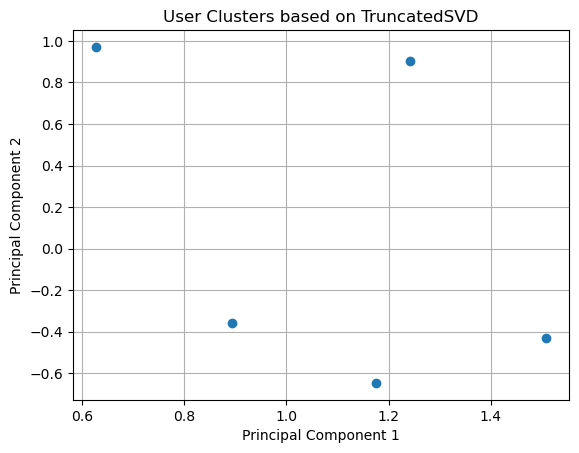

In [13]:
import numpy as np  # Import NumPy for numerical operations
from scipy.sparse import csr_matrix  # Import csr_matrix for sparse matrix representation
from sklearn.decomposition import TruncatedSVD  # Import TruncatedSVD for dimensionality reduction
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Sample user interaction data (assuming one-hot encoded interactions)
user_interactions = {
    'user1': [1, 0, 1, 0, 0],
    'user2': [0, 1, 0, 1, 0],
    'user3': [1, 1, 0, 0, 1],
    'user4': [0, 0, 1, 1, 1],
    'user5': [1, 0, 0, 0, 1]
}

# Convert user interactions to a csr_matrix for efficiency
interactions_matrix = csr_matrix([user_interactions[u] for u in user_interactions])

# Perform dimensionality reduction with TruncatedSVD
svd = TruncatedSVD(n_components=2)  # Choose the number of desired components
reduced_data = svd.fit_transform(interactions_matrix)

# Print the reduced data (user coordinates in the lower-dimensional space)
print("Reduced user data (principal components):")
print(reduced_data)

# Optional: Visualize user clusters (using reduced data for plotting)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])  # Plot user points based on first two components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('User Clusters based on TruncatedSVD')
plt.grid(True)
plt.show()

# Statistics: It includes functions for calculating various statistical measures like mean, median, standard deviation, hypothesis testing, and random number generation.


In [15]:
import numpy as np  # Import NumPy for numerical operations
from scipy import stats  # Import stats module from SciPy for statistical functions

# Generate some random data
data = np.random.normal(loc=0, scale=1, size=100)

# Calculate descriptive statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

print("Descriptive Statistics:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

# Perform hypothesis testing (t-test)
mean2 = 0.5  # hypothesized mean
t_statistic, p_value = stats.ttest_1samp(data, mean2)

print("\nHypothesis Testing (t-test):")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Perform chi-squared test
observed = np.array([[10, 20], [15, 25]])  # observed frequencies
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(observed)

print("\nHypothesis Testing (Chi-squared test):")
print("Chi-squared Statistic:", chi2_statistic)
print("P-Value:", p_value)

# Perform ANOVA (Analysis of Variance)
group1 = np.random.normal(loc=0, scale=1, size=30)
group2 = np.random.normal(loc=1, scale=1, size=30)
group3 = np.random.normal(loc=2, scale=1, size=30)
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("\nHypothesis Testing (ANOVA):")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Generate random numbers from a specific distribution (e.g., normal distribution)
random_numbers = stats.norm.rvs(loc=0, scale=1, size=100)

print("\nRandom Number Generation:")
print("Random numbers from a normal distribution:")
print(random_numbers[:10])  # print first 10 random numbers

Descriptive Statistics:
Mean: 0.028612404119040303
Median: -0.06104445878976715
Standard Deviation: 0.9175155063649708

Hypothesis Testing (t-test):
T-Statistic: -5.111899827912857
P-Value: 1.5574156749108543e-06

Hypothesis Testing (Chi-squared test):
Chi-squared Statistic: 0.011666666666666653
P-Value: 0.9139858996305869

Hypothesis Testing (ANOVA):
F-Statistic: 25.971751923150666
P-Value: 1.430947700334692e-09

Random Number Generation:
Random numbers from a normal distribution:
[-0.49567495 -1.26590688  0.13772972  0.92827072 -0.42923518 -0.73612095
 -1.34611122  0.31213324 -1.04696663  0.35126094]


In [17]:
import numpy as np  # Import NumPy for numerical operations
from scipy import stats  # Import stats module from SciPy for statistical functions

# Sample data (scores for drug and placebo groups)
drug_scores = np.array([85, 78, 92, 83, 79])
placebo_scores = np.array([72, 68, 75, 70, 65])

# Perform a two-tailed independent t-test (assuming unequal variances)
t_statistic, p_value = stats.ttest_ind(drug_scores, placebo_scores, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Interpret the results based on the p-value
if p_value < alpha:
    print("Reject null hypothesis: Drug has a statistically significant effect (p-value =", p_value, ").")
else:
    print("Fail to reject null hypothesis: Insufficient evidence for drug effect (p-value =", p_value, ").")


Reject null hypothesis: Drug has a statistically significant effect (p-value = 0.0029997716656782625 ).


# Fourier Transforms: It allows you to analyze signals in the frequency domain using Fast Fourier Transforms (FFTs).


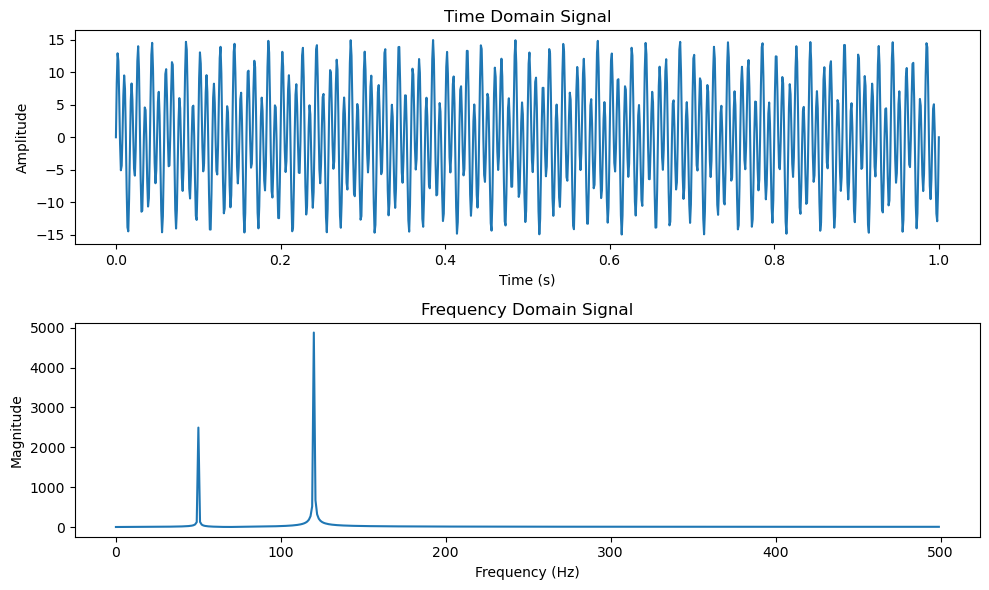

In [19]:
import numpy as np  # Import NumPy for numerical operations
from scipy.fft import fft, fftfreq  # Import fft and fftfreq functions from SciPy
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Generate some sample data
sampling_rate = 1000  # Hz
duration = 1  # seconds
num_samples = sampling_rate * duration
time = np.linspace(0, duration, num_samples)
frequency1 = 50  # Hz
frequency2 = 120  # Hz
amplitude1 = 5
amplitude2 = 10
signal = amplitude1 * np.sin(2 * np.pi * frequency1 * time) + amplitude2 * np.sin(2 * np.pi * frequency2 * time)

# Perform FFT
fft_result = fft(signal)
frequencies = fftfreq(num_samples, 1 / sampling_rate)

# Plot the signal in the time domain
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the FFT result in the frequency domain
plt.subplot(2, 1, 2)
plt.plot(frequencies[:num_samples // 2], np.abs(fft_result)[:num_samples // 2])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


# Signal and Image Processing: SciPy offers functionalities for filtering signals, performing image processing tasks like filtering and edge detection, and working with audio signals.


a) Filtering noisy data:



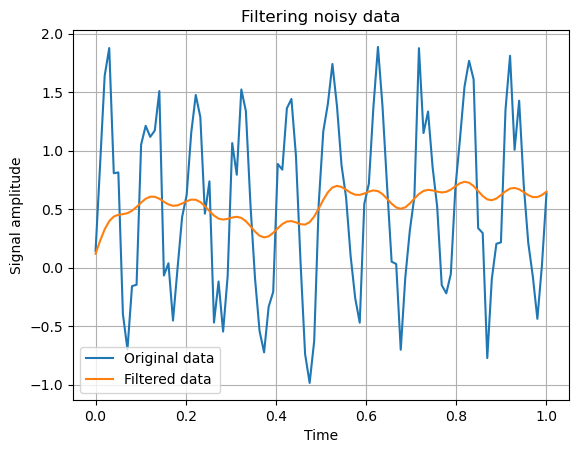

In [21]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import numpy as np  # Import NumPy for numerical operations
from scipy.signal import butter, filtfilt  # Import butter and filtfilt functions from SciPy

# Sample noisy data
data = np.sin(2*np.pi*10*np.linspace(0, 1, 100)) + np.random.rand(100)

# Design a Butterworth filter
cutoff_freq = 5  # Frequency to filter above
fs = 100  # Sampling frequency
nyq = 0.5 * fs  # Nyquist frequency
order = 2  # Filter order

# Filter coefficients
b, a = butter(order, cutoff_freq / nyq, btype='low')

# Apply filter (filtfilt for zero-phase filtering)
filtered_data = filtfilt(b, a, data)

# Plot original and filtered data
plt.plot(np.linspace(0, 1, 100), data, label='Original data')
plt.plot(np.linspace(0, 1, 100), filtered_data, label='Filtered data')
plt.xlabel('Time')
plt.ylabel('Signal amplitude')
plt.legend()
plt.title('Filtering noisy data')
plt.grid(True)
plt.show()

b)Signal Analysis

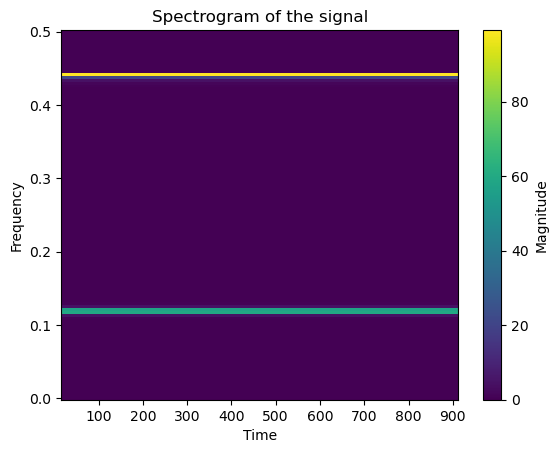

In [23]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import numpy as np  # Import NumPy for numerical operations
from scipy.signal import spectrogram  # Import spectrogram function from SciPy

# Sample signal
t = np.linspace(0, 1, 1000)  # Time vector
signal = np.sin(2*np.pi*440*t) + np.sin(2*np.pi*880*t)  # Example signal with two sine waves

# Calculate spectrogram
f, t, Sxx = spectrogram(signal)  # Compute spectrogram (frequency, time, spectrogram matrix)

# Plot the spectrogram
plt.pcolormesh(t, f, Sxx, shading='auto')  # Plot spectrogram as a colormesh
plt.xlabel('Time')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Spectrogram of the signal')  # Title of the plot
plt.colorbar(label='Magnitude')  # Add colorbar indicating magnitude
plt.show()  # Show the plot


# Ordinary Differential Equation (ODE) Solvers: SciPy provides tools for solving various types of ODEs, which are crucial for modeling physical systems and other phenomena.


a) Solving differential equations:

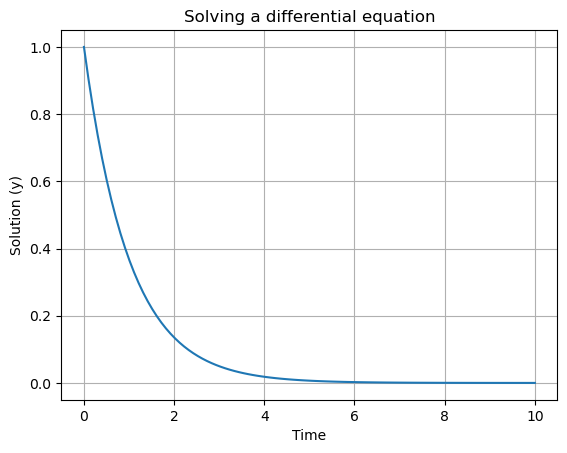

In [25]:

import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from scipy.integrate import odeint  # Import odeint function from SciPy

# Define function for the ODE (dy/dt = -y)
def func(y, t):
    return -y

# Initial condition
y0 = 1

# Time points
t = np.linspace(0, 10, 100)

# Solve the ODE
sol = odeint(func, y0, t)

# Plot the solution
plt.plot(t, sol)
plt.xlabel('Time')
plt.ylabel('Solution (y)')
plt.title('Solving a differential equation')
plt.grid(True)
plt.show()

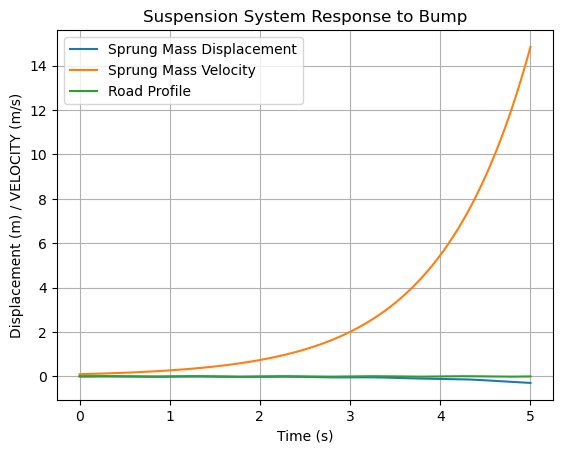

Suspension system simulation completed. Results available in 'displacement' and 'velocity' arrays.


In [27]:
import numpy as np
from scipy.integrate import odeint

# Define system parameters (replace with actual values for your system)
mass_sprung = 1000  # Kg (mass of car body and passengers)
mass_unsprung = 50  # Kg (mass of wheels and suspension components)
spring_constant = 50000  # N/m (stiffness of the spring)
damping_coefficient = 1000  # Ns/m (damping coefficient of the shock absorber)

# Function for the system's differential equations
def suspension_model(state, t, road_profile):
    """
    Represents the system of differential equations for the suspension.

    Args:
        state: A list containing the displacement (x) and velocity (v) of the sprung mass.
        t: Time (independent variable).
        road_profile: Function representing the road profile (displacement) as a function of time.

    Returns:
        A list containing the rate of change of displacement and velocity.
    """
    x, v = state  # Unpack state variables
    acceleration_sprung = -spring_constant/mass_sprung * (x - road_profile(t)) - damping_coefficient/mass_sprung * v
    acceleration_unsprung = spring_constant/mass_sprung * (x - road_profile(t))
    # Assuming no external force acting on the unsprung mass (simplification)
    v_dot = acceleration_sprung
    x_dot = v
    return [v_dot, x_dot]

# Example road profile function (replace with more realistic model if needed)
def bump_road(t, amplitude=0.01, frequency=2*np.pi):
    """
    Simulates a simple bump on the road.
    """
    return amplitude * np.sin(frequency * t)

# Simulation time and time steps
simulation_time = 5.0  # Seconds
t = np.linspace(0, simulation_time, 1000)  # Time points for simulation

# Initial conditions (replace with desired initial displacement and velocity)
initial_state = [0.01, 0.1]  # Displacement (m), Velocity (m/s)

# Solve the differential equations using odeint
# Pass the road profile function as an argument
solution = odeint(suspension_model, initial_state, t, args=(bump_road,))

# Extract displacement and velocity from the solution
displacement = solution[:, 0]
velocity = solution[:, 1]

# Optional: Plot the results (using matplotlib.pyplot)
import matplotlib.pyplot as plt

plt.plot(t, displacement, label='Sprung Mass Displacement')
plt.plot(t, velocity, label='Sprung Mass Velocity')
plt.plot(t, bump_road(t), label='Road Profile')  # Plot the road profile for reference
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m) / VELOCITY (m/s)')
plt.legend()
plt.grid(True)
plt.title('Suspension System Response to Bump')
plt.show()

print("Suspension system simulation completed. Results available in 'displacement' and 'velocity' arrays.")


# Special Functions: SciPy provides access to mathematical functions that aren't common mathematical operations, like Bessel functions, gamma functions, and more.


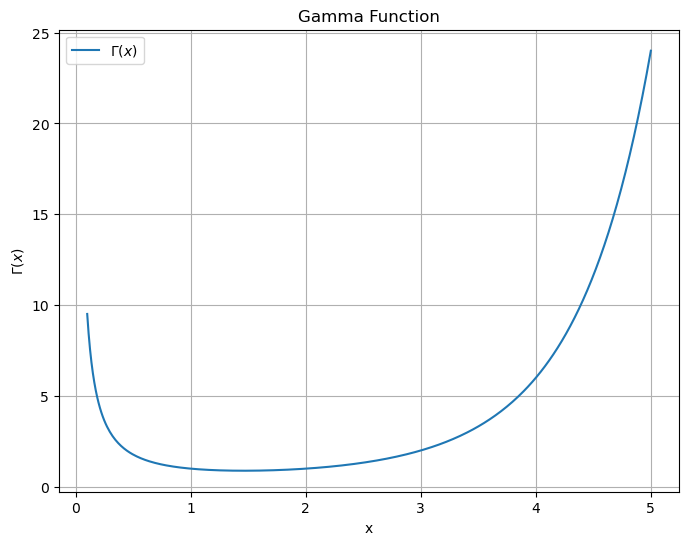

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
# Define an array of real numbers
x = np.linspace(0.1, 5, 400)

# Calculate the gamma function for the array
y = gamma(x)

# Plot the gamma function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\Gamma(x)$')  # Added label for legend
plt.title('Gamma Function')
plt.xlabel('x')
plt.ylabel(r'$\Gamma(x)$')  # Added y-axis label
plt.grid(True)
plt.legend()
plt.show()

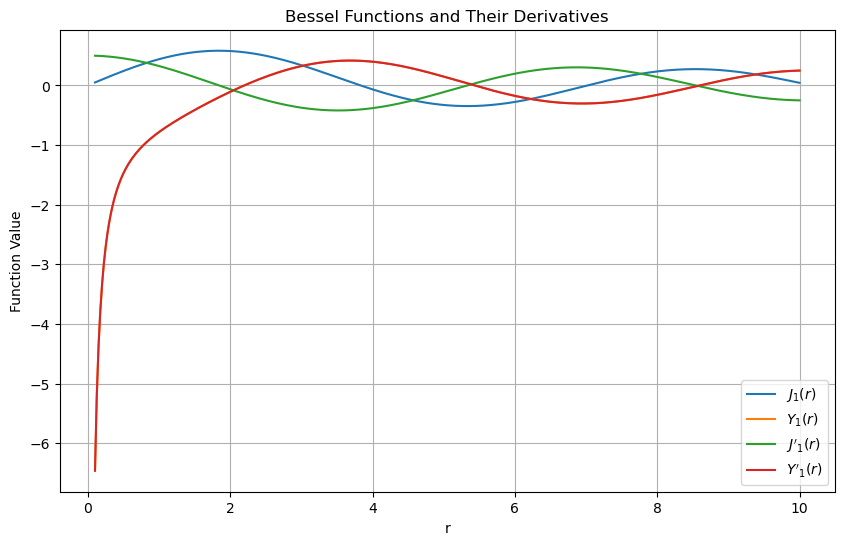

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, yv, jvp, yn

# Define the range of values for the independent variable (r)
r_values = np.linspace(0.1, 10, 400)

# Order of the Bessel function
order = 1

# Calculate Bessel function of the first kind (Jν)
bessel_first_kind = jv(order, r_values)

# Calculate Bessel function of the second kind (Yν)
bessel_second_kind = yv(order, r_values)

# Calculate the derivative of Bessel function of the first kind (J'ν)
bessel_first_kind_derivative = jvp(order, r_values)

# Calculate the derivative of Bessel function of the second kind (Y'ν)
bessel_second_kind_derivative = yn(order, r_values)

# Plotting the Bessel functions and their derivatives
plt.figure(figsize=(10, 6))
plt.plot(r_values, bessel_first_kind, label=r'$J_1(r)$')
plt.plot(r_values, bessel_second_kind, label=r'$Y_1(r)$')
plt.plot(r_values, bessel_first_kind_derivative, label=r"$J'_1(r)$")
plt.plot(r_values, bessel_second_kind_derivative, label=r"$Y'_1(r)$")
plt.title('Bessel Functions and Their Derivatives')
plt.xlabel('r')
plt.ylabel('Function Value')
plt.grid(True)
plt.legend()
plt.show()

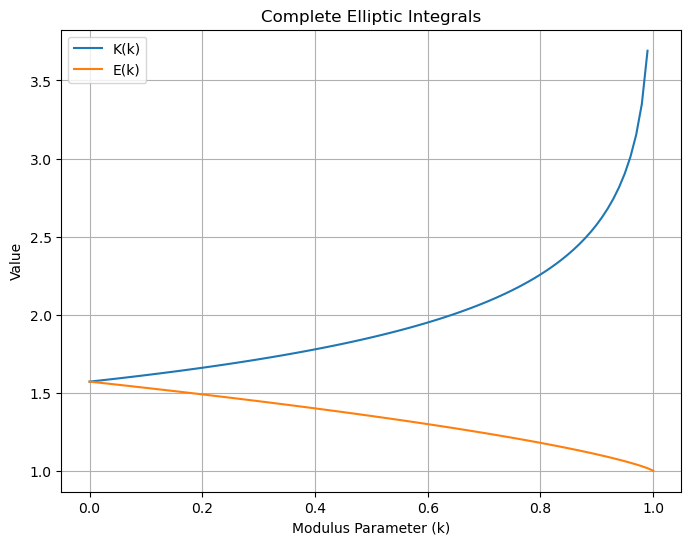

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipe, ellipk

# Define the range of values for the modulus parameter (k)
k_values = np.linspace(0, 1, 100)

# Calculate the complete elliptic integral of the first kind (K(k))
K_values = ellipk(k_values)

# Calculate the complete elliptic integral of the second kind (E(k))
E_values = ellipe(k_values)

# Plotting the complete elliptic integrals
plt.figure(figsize=(8, 6))
plt.plot(k_values, K_values, label=r'K(k)')
plt.plot(k_values, E_values, label=r'E(k)')
plt.title('Complete Elliptic Integrals')
plt.xlabel('Modulus Parameter (k)')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

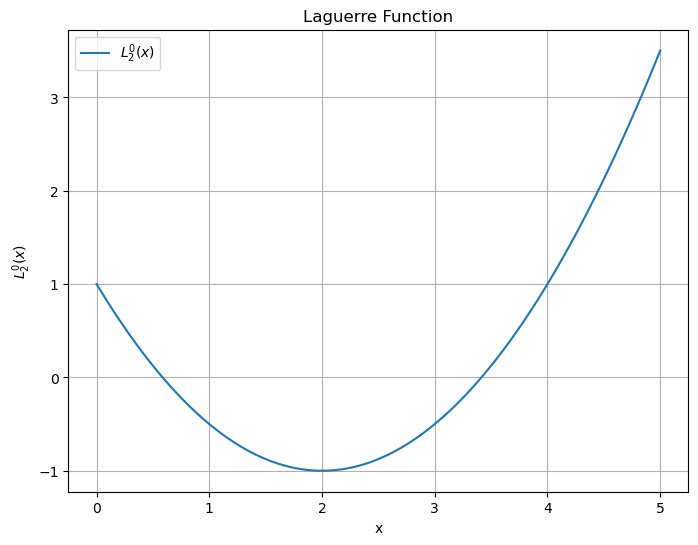

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import laguerre

# Define the range of values for x
x_values = np.linspace(0, 5, 100)

# Parameters for the Laguerre function
n = 2  # Order of the Laguerre polynomial
alpha = 0  # Parameter

# Calculate the Laguerre function
laguerre_values = laguerre(n, alpha)(x_values)

# Plotting the Laguerre function
plt.figure(figsize=(8, 6))
plt.plot(x_values, laguerre_values, label=r'$L_2^0(x)$')
plt.title('Laguerre Function')
plt.xlabel('x')
plt.ylabel(r'$L_2^0(x)$')
plt.grid(True)
plt.legend()
plt.show()


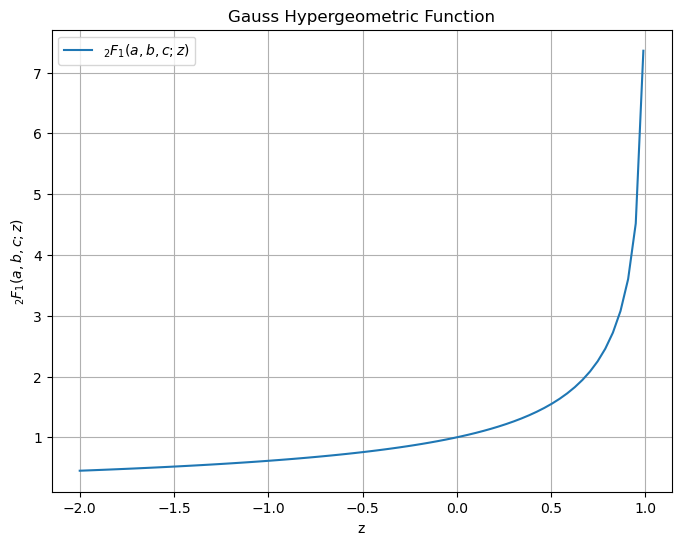

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hyp2f1

# Define the range of values for z
z_values = np.linspace(-2, 2, 100)

# Parameters for the hypergeometric function
a = 1
b = 2
c = 3

# Calculate the hypergeometric function
hypergeom_values = hyp2f1(a, b, c, z_values)

# Plotting the hypergeometric function
plt.figure(figsize=(8, 6))
plt.plot(z_values, hypergeom_values, label=r'$ {}_2 F_1(a,b,c;z) $')   
plt.title('Gauss Hypergeometric Function')
plt.xlabel('z')
plt.ylabel(r'$ {}_2 F_1(a,b,c;z) $')
plt.grid(True)
plt.legend()
plt.show()


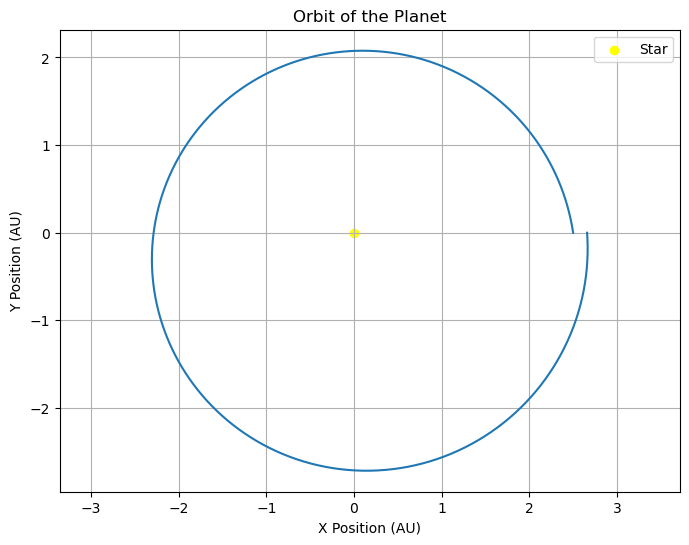

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

# Constants
semi_major_axis = 2.5  # Semi-major axis of the planet's orbit (in AU)
eccentricity = 0.3     # Eccentricity of the orbit
period = 5             # Orbital period of the planet (in years)
time = np.linspace(0, period, 1000)  # Time range for simulation (years)

# Calculate radial distance using Bessel function
radial_distance = semi_major_axis * (1 - eccentricity * jv(1, 2 * np.pi * time / period))

# Plotting the orbit
plt.figure(figsize=(8, 6))
plt.plot(radial_distance * np.cos(2 * np.pi * time / period), radial_distance * np.sin(2 * np.pi * time / period))
plt.scatter(0, 0, color='yellow', label='Star')  # Star at origin
plt.title('Orbit of the Planet')
plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()